<a href="https://colab.research.google.com/github/nishanth3006/100-days-of-machine-learning/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [109]:
df=pd.read_csv('heart.csv')

In [110]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [111]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
556,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
579,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
800,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [113]:
cols=['cp','fbs','restecg','exang']
for i in cols:
  print(df[i].value_counts())

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
fbs
0    872
1    153
Name: count, dtype: int64
restecg
1    513
0    497
2     15
Name: count, dtype: int64
exang
0    680
1    345
Name: count, dtype: int64


In [114]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [115]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target'>

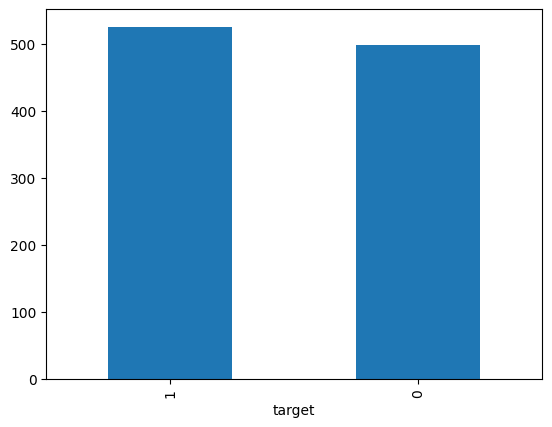

In [116]:
df['target'].value_counts().plot.bar()

<Axes: xlabel='sex'>

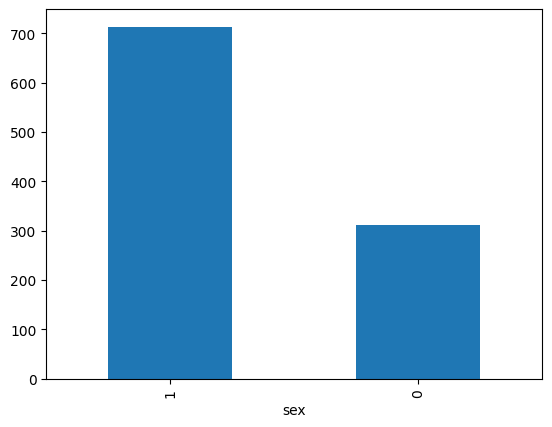

In [117]:
df['sex'].value_counts().plot.bar()

<Axes: ylabel='age'>

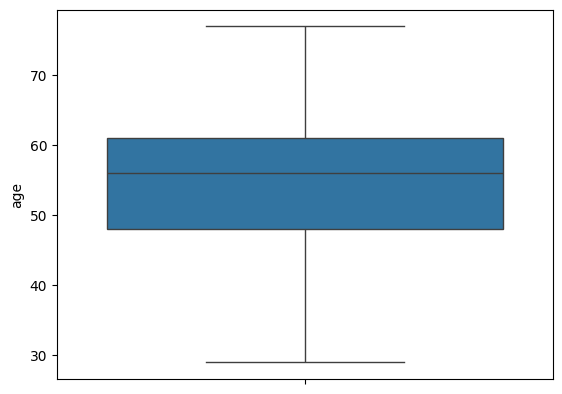

In [118]:
import seaborn as sns
sns.boxplot(df['age'])

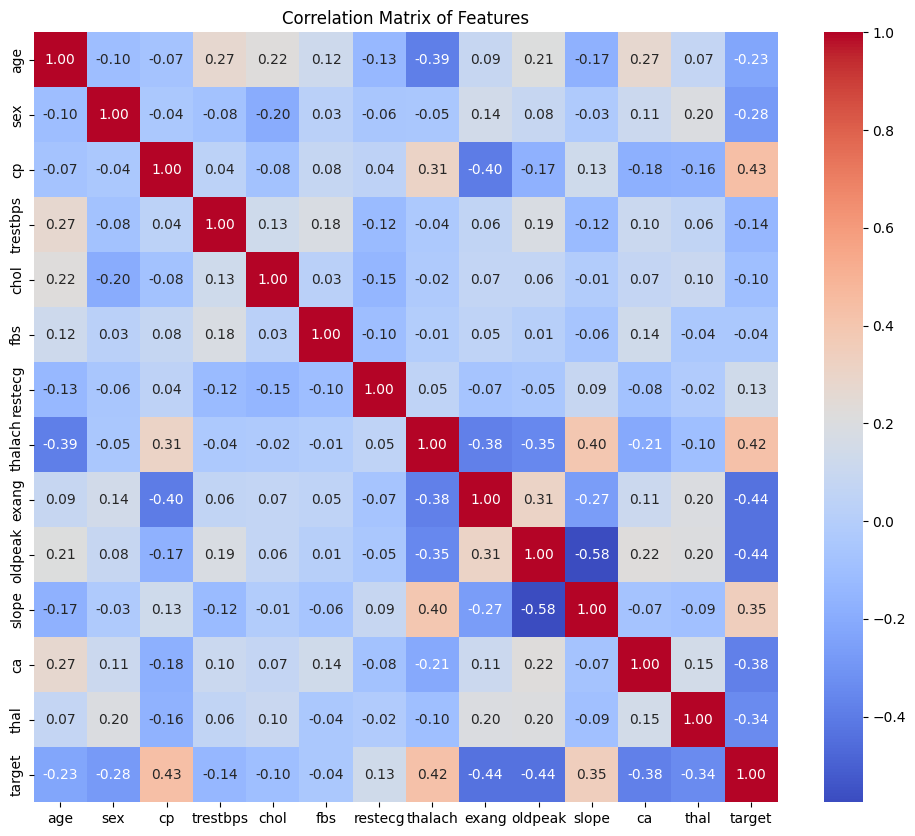

In [119]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

(array([ 43., 234., 325., 368.,  55.]),
 array([29. , 38.6, 48.2, 57.8, 67.4, 77. ]),
 <BarContainer object of 5 artists>)

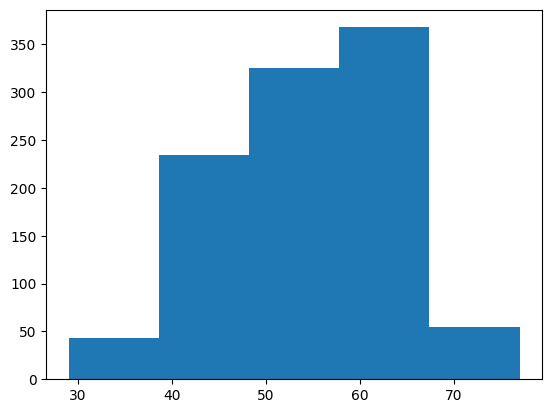

In [120]:
import matplotlib.pyplot as plt
plt.hist(df['age'],bins=5)

In [121]:
from sklearn.preprocessing import StandardScaler
Scalar=StandardScaler()
df['age']=Scalar.fit_transform(df[['age']])
df['trestbps']=Scalar.fit_transform(df[['trestbps']])
df['chol']=Scalar.fit_transform(df[['chol']])
df['thalach']=Scalar.fit_transform(df[['thalach']])
df['oldpeak']=Scalar.fit_transform(df[['oldpeak']])

In [127]:
X = df.drop('target', axis=1)
Y = df['target']

categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features),
        ('passthrough', 'passthrough', ['sex', 'fbs', 'exang'])
    ],
    remainder='drop'
)

X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

feature_names_out = preprocessor.get_feature_names_out()
print(f"\nProcessed feature names ({X_train.shape[1]} features):\n{feature_names_out}")


print(f"\nProcessed Training set shape: {X_train.shape}")
print(f"Processed Test set shape: {X_test.shape}")

Training set shape: (820, 13)
Test set shape: (205, 13)

Processed feature names (27 features):
['num__age' 'num__trestbps' 'num__chol' 'num__thalach' 'num__oldpeak'
 'cat__cp_0' 'cat__cp_1' 'cat__cp_2' 'cat__cp_3' 'cat__restecg_0'
 'cat__restecg_1' 'cat__restecg_2' 'cat__slope_0' 'cat__slope_1'
 'cat__slope_2' 'cat__ca_0' 'cat__ca_1' 'cat__ca_2' 'cat__ca_3'
 'cat__ca_4' 'cat__thal_0' 'cat__thal_1' 'cat__thal_2' 'cat__thal_3'
 'passthrough__sex' 'passthrough__fbs' 'passthrough__exang']

Processed Training set shape: (820, 27)
Processed Test set shape: (205, 27)


In [163]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=6, random_state=42)
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=6, random_state=42)

In [164]:
from sklearn.metrics import accuracy_score
Y_pred=model.predict(X_test)
accuracy_score(Y_test,Y_pred)


0.8878048780487805

In [ ]:
from google.colab import drive
drive.mount('/content/drive')